In [2]:
import numpy as np
import matplotlib.pyplot as plt


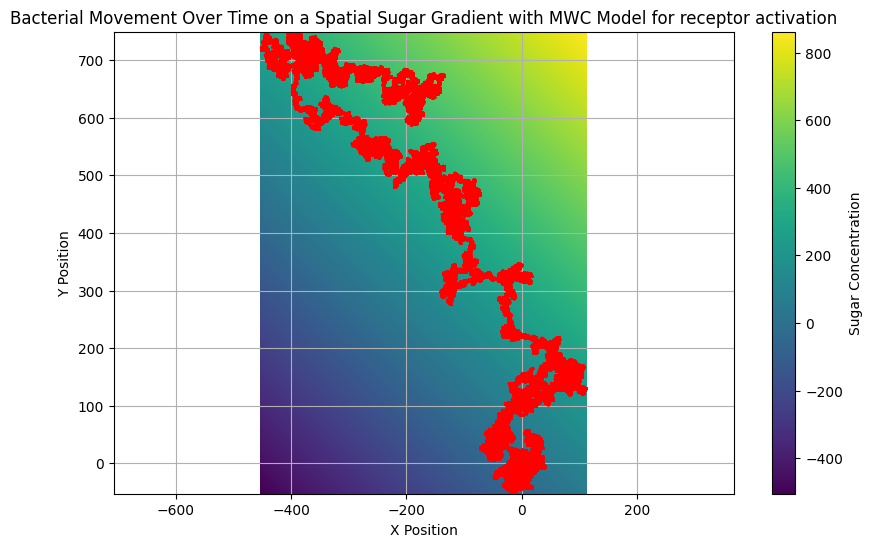

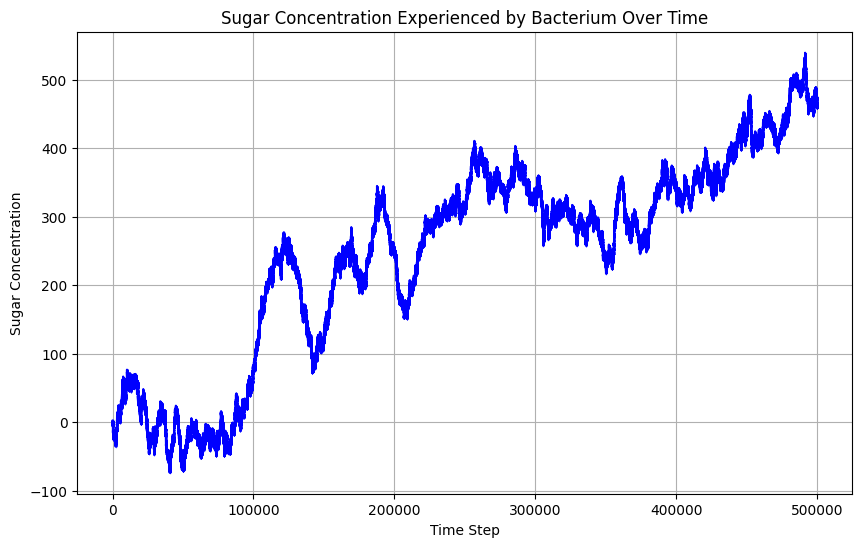

In [15]:
### linear gradient

def sugar_concentration(positions):
    "Calculate the sugar concentration based on position."
    return (positions[0] + positions[1])

def fraction_R(L, S, K_active, K_inactive, n):
    "Calculate the fraction of receptors in the R state based on the MWC model."
    numerator = L * (S / K_active)**n
    denominator = numerator + (L* (1 + (K_active/ K_inactive)*(S/K_active))**n)
    return numerator / denominator

def compute_tumble_probability(L, n, K_active, K_inactive, position, previous_position):
    "Calculate the probability of tumbling"
    current_concentration = sugar_concentration(position)
    previous_concentration = sugar_concentration(previous_position)
    active_fraction_current = fraction_R(L, current_concentration, K_active, K_inactive, n)
    active_fraction_previous = fraction_R(L, previous_concentration, K_active, K_inactive, n)
    active_fraction_difference = np.clip(active_fraction_current - active_fraction_previous, -0.01, 0.99)
    # A negative change increases tumble probability, positive change reduces it
    return 0.99 - active_fraction_difference

def choose_new_direction():
    "Choose a new random direction."
    direction = np.random.uniform(0, 2*np.pi)
    return direction

def simulate_movement(duration, L, n, K_active, K_inactive, initial_position, step_size=0.5):
    "Simulate bacterial movement"
    positions = [np.array(initial_position)]
    sugar_concentrations = [sugar_concentration(initial_position)]  
    time_step = 0.1
    steps = int(duration / time_step)  # Calculate the number of steps based on the time step
    direction = np.pi/4

    for _ in range(steps):
        position = positions[-1]
        if len(positions) > 1:
            tumble_probability = compute_tumble_probability(L, n, K_active, K_inactive, position, positions[-2])
        else:
            tumble_probability = 0.99  # High initial tumble probability to simulate initial exploration

        if np.random.rand() < tumble_probability:
            direction = choose_new_direction()

        new_position = position + step_size * np.array([np.cos(direction), np.sin(direction)])
        positions.append(new_position)
        sugar_concentrations.append(sugar_concentration(new_position))  # Record the sugar concentration at new position

    return np.array(positions), sugar_concentrations

# Parameters
### S = the ligand (sugar) concentration
L = 10  # Equilibrium constant between R and T states without ligand
n = 5  # Number of binding sites
K_active = 1  # Dissociation constant for active state
K_inactive = 10  # Dissociation constant for inactive state
duration = 50000  # Simulation duration in arbitrary units
initial_position = [0, 0]  # Starting position

# Run simulation
positions, sugar_concentrations = simulate_movement(duration, L, n, K_active, K_inactive, initial_position)

# Plotting
plt.figure(figsize=(10, 6))
# Generate a mesh grid for the background concentration levels
x = np.linspace(min(positions[:, 0]) - 1, max(positions[:, 0]) + 1, 400)
y = np.linspace(min(positions[:, 1]) - 1, max(positions[:, 1]) + 1, 400)
X, Y = np.meshgrid(x, y)
Z = sugar_concentration([X, Y]) 

plt.pcolormesh(X, Y, Z, shading='auto', cmap='viridis')
plt.colorbar(label='Sugar Concentration')
plt.plot(positions[:, 0], positions[:, 1], marker='o', markersize=1, color='red')
plt.title('Bacterial Movement Over Time on a Spatial Sugar Gradient with MWC Model for receptor activation')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sugar_concentrations, marker='o', linestyle='-', markersize=0.1, color='blue')
plt.title('Sugar Concentration Experienced by Bacterium Over Time')
plt.xlabel('Time Step')
plt.ylabel('Sugar Concentration')
plt.grid(True)
plt.show()

#shallow (slow exponential) vs linear gradient
#zhu, shimizu, berg (model)

#A1100
#monday, talk at 12:00




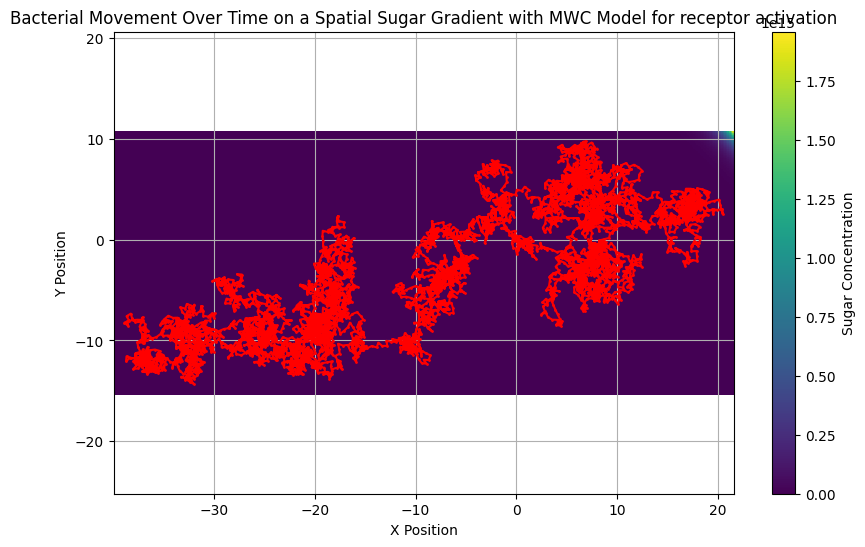

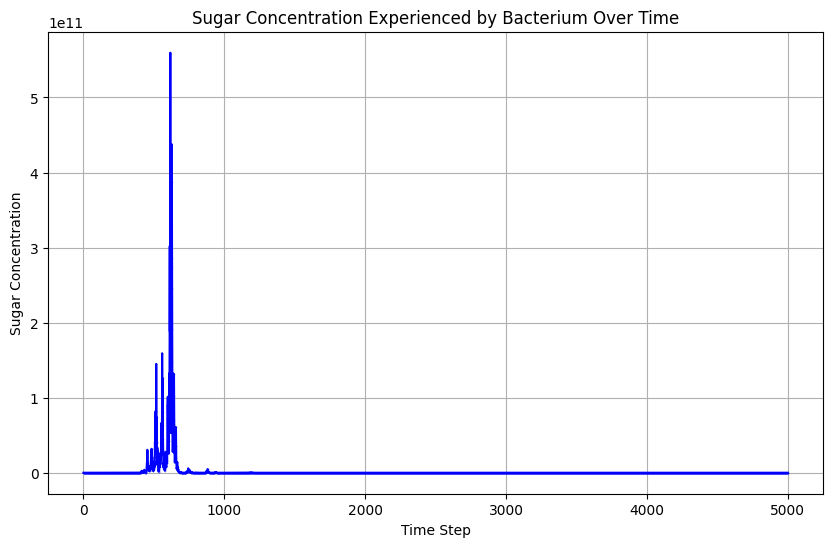

In [46]:
def sugar_concentration(positions):
    """Calculate the sugar concentration based on position using an exponential function."""
    return 20*np.exp((positions[0] + positions[1]))

def fraction_R(L, S, K_active, K_inactive, n):
    "Calculate the fraction of receptors in the R state based on the MWC model."
    numerator = L * (S / K_active)**n
    denominator = numerator + (L* (1 + (K_active/ K_inactive)*(S/K_active))**n)
    return numerator / denominator

def compute_tumble_probability(L, n, K_active, K_inactive, position, previous_position):
    "Calculate the probability of tumbling"
    current_concentration = sugar_concentration(position)
    previous_concentration = sugar_concentration(previous_position)
    active_fraction_current = fraction_R(L, current_concentration, K_active, K_inactive, n)
    active_fraction_previous = fraction_R(L, previous_concentration, K_active, K_inactive, n)
    active_fraction_difference = np.clip(active_fraction_current - active_fraction_previous, -0.01, 0.99)
    # A negative change increases tumble probability, positive change reduces it
    return 0.99 - active_fraction_difference

def choose_new_direction():
    "Choose a new random direction."
    direction = np.random.uniform(0, 2*np.pi)
    return direction

def simulate_movement(duration, L, n, K_active, K_inactive, initial_position, step_size=0.5):
    "Simulate bacterial movement"
    positions = [np.array(initial_position)]
    sugar_concentrations = [sugar_concentration(initial_position)]  
    time_step = 10
    steps = int(duration / time_step)  # Calculate the number of steps based on the time step
    direction = np.pi/4

    for _ in range(steps):
        position = positions[-1]
        if len(positions) > 1:
            tumble_probability = compute_tumble_probability(L, n, K_active, K_inactive, position, positions[-2])
        else:
            tumble_probability = 0.99  # High initial tumble probability to simulate initial exploration

        if np.random.rand() < tumble_probability:
            direction = choose_new_direction()

        new_position = position + step_size * np.array([np.cos(direction), np.sin(direction)])
        positions.append(new_position)
        sugar_concentrations.append(sugar_concentration(new_position))  # Record the sugar concentration at new position

    return np.array(positions), sugar_concentrations

# Parameters
### S = the ligand (sugar) concentration
L = 10  # Equilibrium constant between R and T states without ligand
n = 5  # Number of binding sites
K_active = 1  # Dissociation constant for active state
K_inactive = 10  # Dissociation constant for inactive state
duration = 50000  # Simulation duration in arbitrary units
initial_position = [0, 0]  # Starting position

# Run simulation
positions, sugar_concentrations = simulate_movement(duration, L, n, K_active, K_inactive, initial_position)

# Plotting
plt.figure(figsize=(10, 6))
# Generate a mesh grid for the background concentration levels
x = np.linspace(min(positions[:, 0]) - 1, max(positions[:, 0]) + 1, 400)
y = np.linspace(min(positions[:, 1]) - 1, max(positions[:, 1]) + 1, 400)
X, Y = np.meshgrid(x, y)
Z = sugar_concentration([X, Y]) 

plt.pcolormesh(X, Y, Z, shading='auto', cmap='viridis')
plt.colorbar(label='Sugar Concentration')
plt.plot(positions[:, 0], positions[:, 1], marker='o', markersize=1, color='red')
plt.title('Bacterial Movement Over Time on a Spatial Sugar Gradient with MWC Model for receptor activation')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sugar_concentrations, marker='o', linestyle='-', markersize=0.1, color='blue')
plt.title('Sugar Concentration Experienced by Bacterium Over Time')
plt.xlabel('Time Step')
plt.ylabel('Sugar Concentration')
plt.grid(True)
plt.show()

